In [1]:
#File path
path = 'data/total-cases.csv'

In [2]:
#!pip install plotly

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [4]:
#Read csv file.
df = pd.read_csv(path)

In [5]:
df.head()

,Country,Unnamed: 1,Date,Confirmed_cases,Total_death,Active
0,India,IND,"Jan 30, 2020",1,0,1
1,India,IND,"Jan 31, 2020",1,0,1
2,India,IND,"Feb 1, 2020",1,0,1
3,India,IND,"Feb 2, 2020",2,0,2
4,India,IND,"Feb 3, 2020",2,0,2


In [6]:
df.tail()

,Country,Unnamed: 1,Date,Confirmed_cases,Total_death,Active
96,India,IND,"May 5, 2020",49400,0,0
97,India,IND,"May 6, 2020",52987,0,0
98,India,IND,"May 7, 2020",56351,0,0
99,India,IND,"May 8, 2020",59695,0,0
100,India,IND,"May 9, 2020",62808,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          101 non-null    object
 1   Unnamed: 1       101 non-null    object
 2   Date             101 non-null    object
 3   Confirmed_cases  101 non-null    int64 
 4   Total_death      101 non-null    int64 
 5   Active           101 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.9+ KB


In [8]:
df.drop(['Unnamed: 1'],axis=1, inplace= True)
df.head()

,Country,Date,Confirmed_cases,Total_death,Active
0,India,"Jan 30, 2020",1,0,1
1,India,"Jan 31, 2020",1,0,1
2,India,"Feb 1, 2020",1,0,1
3,India,"Feb 2, 2020",2,0,2
4,India,"Feb 3, 2020",2,0,2


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Country          101 non-null    object        
 1   Date             101 non-null    datetime64[ns]
 2   Confirmed_cases  101 non-null    int64         
 3   Total_death      101 non-null    int64         
 4   Active           101 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.1+ KB


In [11]:
df.tail()

,Country,Date,Confirmed_cases,Total_death,Active
96,India,2020-05-05,49400,0,0
97,India,2020-05-06,52987,0,0
98,India,2020-05-07,56351,0,0
99,India,2020-05-08,59695,0,0
100,India,2020-05-09,62808,0,0


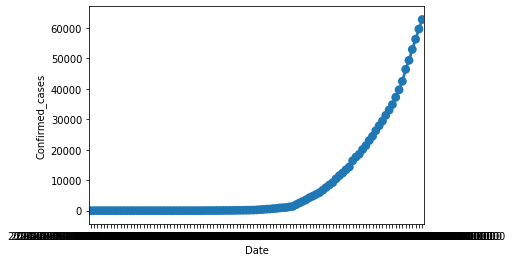

In [12]:
#Plot covid confirmed cases till 09/05/2020 :
sns.pointplot(df['Date'],df['Confirmed_cases'])
plt.show()

In [13]:
#!pip install fbprophet

In [14]:
#Forcasting of Data:
#Fbprophet library is used for time series analysis
#It is creaded by Facebook 
# There are one more library called ARIMA 

In [15]:
#Forcasiting for confirmed cases:
from fbprophet import Prophet

In [16]:
confirmed = df.groupby('Date')['Confirmed_cases'].sum().reset_index()
confirmed.head()

,Date,Confirmed_cases
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,2


In [17]:
confirmed.tail()

,Date,Confirmed_cases
96,2020-05-05,49400
97,2020-05-06,52987
98,2020-05-07,56351
99,2020-05-08,59695
100,2020-05-09,62808


In [18]:
#According to the fbprophet date column name should be 'ds' and data name should be 'y'

confirmed = confirmed.rename(columns={"Date":"ds","Confirmed_cases":"y"})
confirmed.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,2


In [19]:
#Bulding the model:
model = Prophet(interval_width=0.95)

In [20]:
#Train the model:
model.fit(confirmed)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
#Future prediction:
future_dates = model.make_future_dataframe(periods=7)

In [22]:
#Future prediction for 7 days:
future_dates_weekly = model.make_future_dataframe(periods=7)

In [23]:
#Future prediction for 30 days:
future_dates_monthly = model.make_future_dataframe(periods=30)

In [24]:
#Future prediction for 365 days:
future_dates_yearly = model.make_future_dataframe(periods=365)

In [25]:
future_dates.tail()

,ds
103,2020-05-12
104,2020-05-13
105,2020-05-14
106,2020-05-15
107,2020-05-16


In [26]:
forcast_weekly = model.predict(future_dates)

In [27]:
forcast_weekly[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
98,2020-05-07,52504.387632,49965.763869,55009.941767
99,2020-05-08,54596.793272,51984.225107,57363.205861
100,2020-05-09,56764.919522,54268.384538,59544.326442
101,2020-05-10,58323.842488,55668.923878,60854.376804
102,2020-05-11,60395.187757,57917.598130,62912.124209
103,2020-05-12,62430.251769,59685.402744,65141.146481
104,2020-05-13,64505.795431,61912.445445,67232.326218
105,2020-05-14,66597.162670,63739.474034,69337.703424
106,2020-05-15,68689.568310,65787.624910,71619.701169
107,2020-05-16,70857.694560,67901.021393,73593.123923


Text(47.625, 0.5, 'confirmed cases')

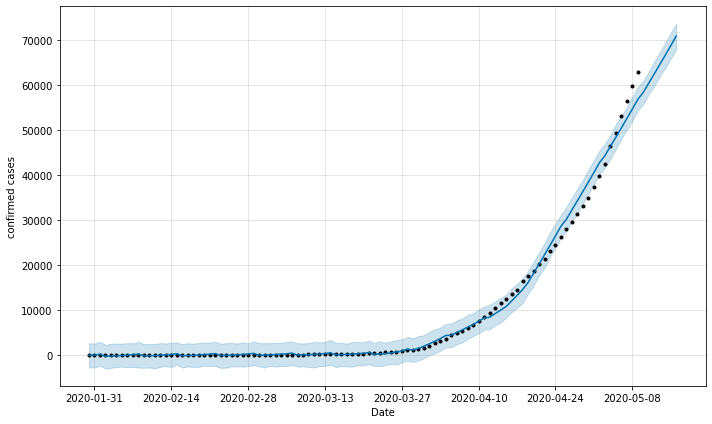

In [28]:
# Plot the data
confirmed_plot = model.plot(forcast_weekly)
axes = confirmed_plot.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('confirmed cases')

In [29]:
forcast_monthly = model.predict(future_dates_monthly)
forcast_monthly[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
121,2020-05-30,99043.244636,92808.298259,105375.181134
122,2020-05-31,100602.167602,93491.283735,108172.789366
123,2020-06-01,102673.512871,95439.831045,110342.424382
124,2020-06-02,104708.576883,97060.948969,112999.108024
125,2020-06-03,106784.120545,98531.446544,115168.440515
126,2020-06-04,108875.487784,100398.919972,117644.788267
127,2020-06-05,110967.893424,102415.625402,120721.091209
128,2020-06-06,113136.019674,103702.413259,123254.774814
129,2020-06-07,114694.942640,104596.541122,125366.375231
130,2020-06-08,116766.287909,106655.202305,128414.686390


Text(41.25, 0.5, 'confirmed cases')

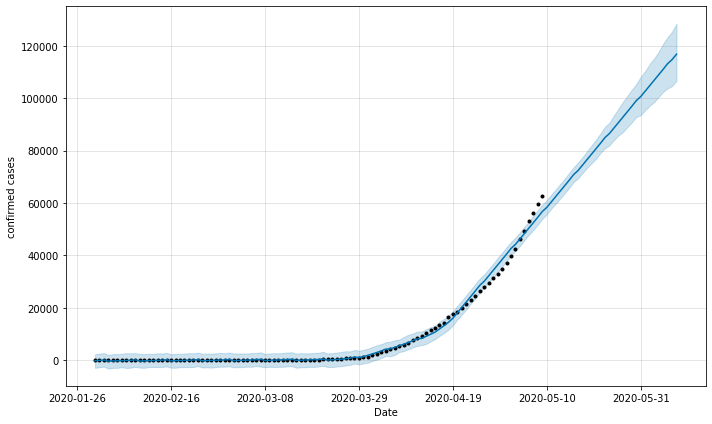

In [30]:
# Plot the data
confirmed_plot = model.plot(forcast_monthly)
axes = confirmed_plot.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('confirmed cases')

In [31]:
forcast_yearly = model.predict(future_dates_yearly)
forcast_yearly[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
456,2021-04-30,773328.320209,364587.066428,1.213768e+06
457,2021-05-01,775496.446459,364752.400365,1.218439e+06
458,2021-05-02,777055.369425,366411.444468,1.217713e+06
459,2021-05-03,779126.714694,366175.907536,1.225392e+06
460,2021-05-04,781161.778706,367901.290302,1.226671e+06
461,2021-05-05,783237.322368,367289.354458,1.229523e+06
462,2021-05-06,785328.689606,365718.043377,1.236664e+06
463,2021-05-07,787421.095247,368338.942151,1.238181e+06
464,2021-05-08,789589.221497,367904.693267,1.245128e+06
465,2021-05-09,791148.144463,366683.796770,1.248570e+06


Text(35.0, 0.5, 'confirmed cases')

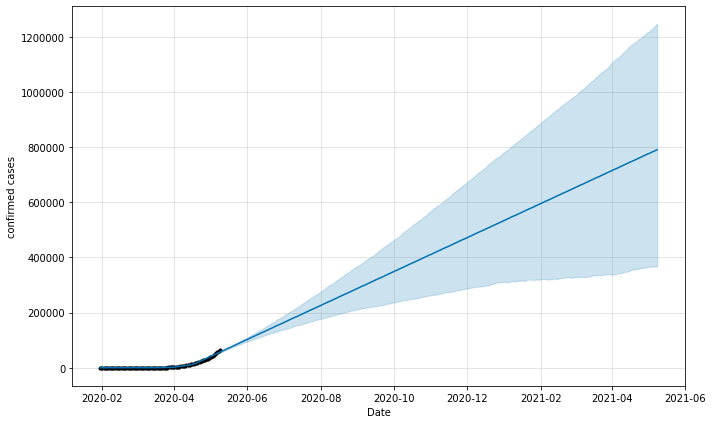

In [32]:
# Plot the data
confirmed_plot = model.plot(forcast_yearly)
axes = confirmed_plot.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('confirmed cases')